In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [2]:
# load the dataset
data = pd.read_csv("D:\\Data\weather.csv")
data = data.fillna(data.mean())
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
means = data.mean()
stds = data.std()

In [5]:
stds

precipitation    6.680194
temp_max         7.349758
temp_min         5.023004
wind             1.437825
dtype: float64

In [6]:
 import numpy as np
import pandas as pd



# Calculate the mean and standard deviation of the "Glucose" column
mean_pl = np.mean(data["temp_max"])
std_deviation_pl = np.std(data["temp_max"])

# Calculate the standard deviation of each value in the "Pregnancies" column
standardized_values_pl = (data["temp_max"] - mean_pl) / std_deviation_pl

# Print the standardized values
print("Standardized Values:")
print(standardized_values_pl)


Standardized Values:
0      -0.495299
1      -0.794731
2      -0.645015
3      -0.576962
4      -1.026111
          ...   
1456   -1.638585
1457   -1.556922
1458   -1.257490
1459   -1.475259
1460   -1.475259
Name: temp_max, Length: 1461, dtype: float64


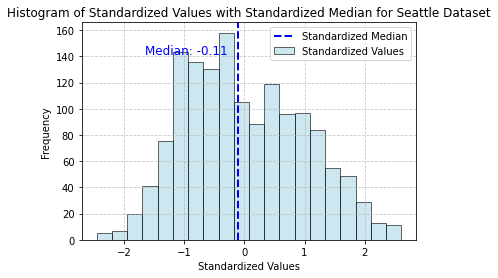

In [7]:

median_pl = np.median(data["temp_max"])

# Find the standardized value of the median
standardized_median_pl = (median_pl - mean_pl) / std_deviation_pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# Create a histogram for the standardized values

plt.hist(standardized_values_pl, bins=20, alpha=0.6, color='lightblue', label='Standardized Values', edgecolor='black')

# Add a vertical line to represent the standardized median in red
plt.axvline(standardized_median_pl, color='blue', linestyle='dashed', linewidth=2, label='Standardized Median')

# Set labels and title
plt.xlabel('Standardized Values')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Values with Standardized Median for Seattle Dataset')

# Add a legend
plt.legend()
plt.text(plt.xlim()[0] + 1.05, plt.ylim()[1] * 0.9, f'Median: {(standardized_median_pl):.2f}', color='blue', ha='left', va='top', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



In [8]:
# Calculate the median
median_pl = np.median(data["temp_max"])

# Find the standardized value of the median
standardized_median_pl = (median_pl - mean_pl) / std_deviation_pl

# Select the values that are less than or equal to the standardized median
left_mask = standardized_values_pl <= standardized_median_pl
left_selected_values = data["temp_max"][left_mask]

# Select the values that are greater than the standardized median
right_mask = standardized_values_pl > standardized_median_pl
right_selected_values = data["temp_max"][right_mask]

# Print the selected values
print("Left Selected Values:")
print(left_selected_values)
print("Right Selected Values:")
print(right_selected_values)
print(len(right_selected_values))

Left Selected Values:
0       12.8
1       10.6
2       11.7
3       12.2
4        8.9
        ... 
1456     4.4
1457     5.0
1458     7.2
1459     5.6
1460     5.6
Name: temp_max, Length: 758, dtype: float64
Right Selected Values:
36      16.1
92      16.7
97      16.1
98      21.1
99      20.0
        ... 
1389    16.1
1390    16.1
1393    19.4
1395    16.1
1398    17.2
Name: temp_max, Length: 703, dtype: float64
703


In [9]:

# Calculate the absolute difference between each value and the median
left_diff = np.abs(left_selected_values - median_pl)
right_diff = np.abs(right_selected_values - median_pl)

# Sort the values based on the absolute difference
left_sorted = left_selected_values.reset_index(drop=True)[np.argsort(left_diff)]
right_sorted = right_selected_values.reset_index(drop=True)[np.argsort(right_diff)]


# Calculate the number of values to select from each side
num_values = len(left_selected_values)

# Take the closest 75% of the left and right side values
left_75_percent = left_sorted[:int(0.85 * num_values)]
right_75_percent = right_sorted[:int(0.85 * num_values)]

# Print the 75% of the left and right side values that are closest to the median
print("Left 75%:")
print(left_75_percent)
print("Right 75%:")
print(right_75_percent)
print(len(right_75_percent))
print(len(left_75_percent))

selected_left_rows = data.loc[left_75_percent.index]
selected_right_rows = data.loc[right_75_percent.index]

# Print the selected rows
print("Selected Left Rows:")
print(selected_left_rows)
print("Selected Right Rows:")
print(selected_right_rows)

Left 75%:
687    15.6
107    15.6
465    15.6
142    15.6
467    15.6
       ... 
537     7.2
207     6.7
205     6.7
180     6.7
187     6.7
Name: temp_max, Length: 644, dtype: float64
Right 75%:
0      16.1
513    16.1
510    16.1
35     16.1
36     16.1
       ... 
423    29.4
269    30.0
422    30.0
574    30.0
638    30.0
Name: temp_max, Length: 644, dtype: float64
644
644
Selected Left Rows:
           date  precipitation  temp_max  temp_min  wind  weather
687  2013-11-18           26.2      12.8       9.4   3.9     rain
107  2012-04-17            1.8      10.0       4.4   2.0     rain
465  2013-04-10            9.4      15.0       8.9   6.4     rain
142  2012-05-22            6.1      12.8       8.9   4.8     rain
467  2013-04-12            9.7       7.8       4.4   4.6     rain
..          ...            ...       ...       ...   ...      ...
537  2013-06-21            0.3      20.6      12.2   1.5     rain
207  2012-07-26            0.0      25.6      12.8   2.2  drizzle
205  

In [10]:
combined_dataset = pd.concat([selected_left_rows, selected_right_rows], axis=0)

# Print the combined dataset
print("Combined Dataset:")
print(combined_dataset)

Combined Dataset:
           date  precipitation  temp_max  temp_min  wind  weather
687  2013-11-18           26.2      12.8       9.4   3.9     rain
107  2012-04-17            1.8      10.0       4.4   2.0     rain
465  2013-04-10            9.4      15.0       8.9   6.4     rain
142  2012-05-22            6.1      12.8       8.9   4.8     rain
467  2013-04-12            9.7       7.8       4.4   4.6     rain
..          ...            ...       ...       ...   ...      ...
423  2013-02-27            4.6      10.0       4.4   1.8     rain
269  2012-09-26            0.0      19.4       9.4   1.7  drizzle
422  2013-02-26            0.5       8.9       3.9   3.8     rain
574  2013-07-28            0.0      21.1      12.2   3.4      fog
638  2013-09-30           18.5      13.9      10.0   6.3     rain

[1288 rows x 6 columns]


In [11]:
combined_dataset_without_variety = combined_dataset.drop(columns=["weather"])
combined_dataset_without_variety = combined_dataset.drop(columns=["date"])
# Print the modified dataset
print("Combined Dataset without 'variety' column:")
print(combined_dataset_without_variety)
print(len(combined_dataset_without_variety))

Combined Dataset without 'variety' column:
     precipitation  temp_max  temp_min  wind  weather
687           26.2      12.8       9.4   3.9     rain
107            1.8      10.0       4.4   2.0     rain
465            9.4      15.0       8.9   6.4     rain
142            6.1      12.8       8.9   4.8     rain
467            9.7       7.8       4.4   4.6     rain
..             ...       ...       ...   ...      ...
423            4.6      10.0       4.4   1.8     rain
269            0.0      19.4       9.4   1.7  drizzle
422            0.5       8.9       3.9   3.8     rain
574            0.0      21.1      12.2   3.4      fog
638           18.5      13.9      10.0   6.3     rain

[1288 rows x 5 columns]
1288


In [12]:
combined_dataset_without_variety=combined_dataset_without_variety.drop(columns=["weather"])


In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming combined_dataset_without_variety is your dataset without the "variety" column

# Number of clusters (you can adjust this)
k = 3

# Initialize K-means with k clusters
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit K-means to the data
kmeans.fit(combined_dataset_without_variety)

# Predict cluster labels for each data point
clusters = kmeans.predict(combined_dataset_without_variety)

# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(combined_dataset_without_variety, clusters)

# Print the silhouette score and cluster labels
print("Silhouette Score for {} clusters: {:.2f}".format(k, silhouette_avg))
print("Cluster Labels:", clusters)


Silhouette Score for 3 clusters: 0.48
Cluster Labels: [1 0 0 ... 0 2 1]


In [14]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

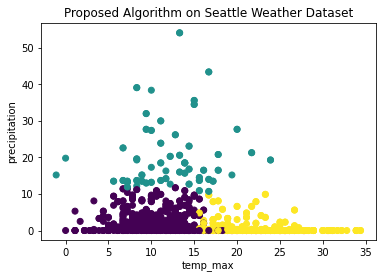

In [15]:
# Access columns by their names
feature1 = combined_dataset_without_variety['temp_max']
feature2 = combined_dataset_without_variety['precipitation']

# Create a scatter plot
plt.scatter(feature1, feature2, c=clusters, cmap='viridis')
plt.title('Proposed Algorithm on Seattle Weather Dataset')
plt.xlabel('temp_max')
plt.ylabel('precipitation')
plt.show()

# Create a scatter plot

In [ ]:
#K MEANS

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the diabetes dataset
data = pd.read_csv("D:\\Data\\weather.csv")
data = data.fillna(data.mean())
# Drop the "Outcome" column
data = data.drop(columns=["date","weather"])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Define a range of k values for K-Means
k_values = range(2, 11)

# Initialize variables to store outlier counts and silhouette scores
outlier_counts = []
silhouette_scores = []

# Perform K-Means clustering for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Detect and count outliers using the Mahalanobis distance method
    cluster_centers = kmeans.cluster_centers_
    mahalanobis_distances = np.sqrt(np.sum(((scaled_data - cluster_centers[cluster_labels]) ** 2), axis=1))
    threshold = np.percentile(mahalanobis_distances, 85)  # Define a threshold for outliers (e.g., 95th percentile)
    outliers = np.where(mahalanobis_distances > threshold)[0]
    outlier_counts.append(len(outliers))
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Print the number of outliers deleted for each k
for k, outliers_deleted in zip(k_values, outlier_counts):
    print(f'Number of outliers deleted for k={k}: {outliers_deleted}')

# Print the silhouette scores for each k
for k, silhouette_avg in zip(k_values, silhouette_scores):
    print(f'Silhouette score for k={k}: {silhouette_avg}')


Number of outliers deleted for k=2: 219
Number of outliers deleted for k=3: 219
Number of outliers deleted for k=4: 219
Number of outliers deleted for k=5: 219
Number of outliers deleted for k=6: 219
Number of outliers deleted for k=7: 219
Number of outliers deleted for k=8: 219
Number of outliers deleted for k=9: 219
Number of outliers deleted for k=10: 219
Silhouette score for k=2: 0.3524712777923641
Silhouette score for k=3: 0.37869310072479023
Silhouette score for k=4: 0.38884797781770586
Silhouette score for k=5: 0.30126421419680843
Silhouette score for k=6: 0.3010407897670115
Silhouette score for k=7: 0.28693246749394974
Silhouette score for k=8: 0.256301051022397
Silhouette score for k=9: 0.2600588072918063
Silhouette score for k=10: 0.2545650590829386
